# Logistic Regression

### Train a simple logistic regression model

In [1]:
import numpy as np
from sklearn import linear_model

data = np.loadtxt('dataset/exam_score.csv', delimiter = ',')

Which is the target column?

In [2]:
x = data[:, :2]
y = data[:, 2].astype(int)

Split the data into training set and test set

In [3]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.8, random_state = 610)

In [4]:
# Fit a logistic regression model with the training set

estimator = linear_model.LogisticRegression(solver = 'lbfgs')
estimator.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
# Perform prediction on the test set using trained logistic regression model

from sklearn import metrics

y_pred = estimator.predict(x_test)
print('accuracy:', metrics.accuracy_score(y_test, y_pred))

accuracy: 0.8875


Visualize the linear model now

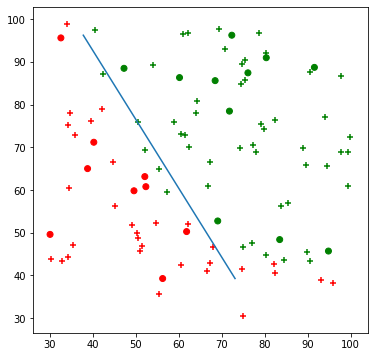

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

color = ['red', 'green']
y_train_color, y_test_color = [color[i] for i in y_train], [color[i] for i in y_test]
plt.figure(figsize = (6, 6))
plt.scatter(x_train[:,0], x_train[:,1], c = y_train_color, marker = 'o')
plt.scatter(x_test[:,0], x_test[:,1], c = y_test_color, marker = '+')
plt.plot((- estimator.coef_[0][1] * np.array((min(x_train[:,1]), max(x_train[:,1]))) - estimator.intercept_[0]) / estimator.coef_[0][0], np.array((min(x_train[:,1]), max(x_train[:,1]))))
plt.show()

### Logistic Regression with different model complexity trade-off hyper-parameters

accuracy for test data at C=0.000100 is 0.825000
model complexity: 0.013574902912137707
accuracy for test data at C=0.010000 is 0.862500
model complexity: 0.1747431494215675
accuracy for test data at C=0.100000 is 0.875000
model complexity: 0.4018718899502554
accuracy for test data at C=1.000000 is 0.887500
model complexity: 0.7872586209689485


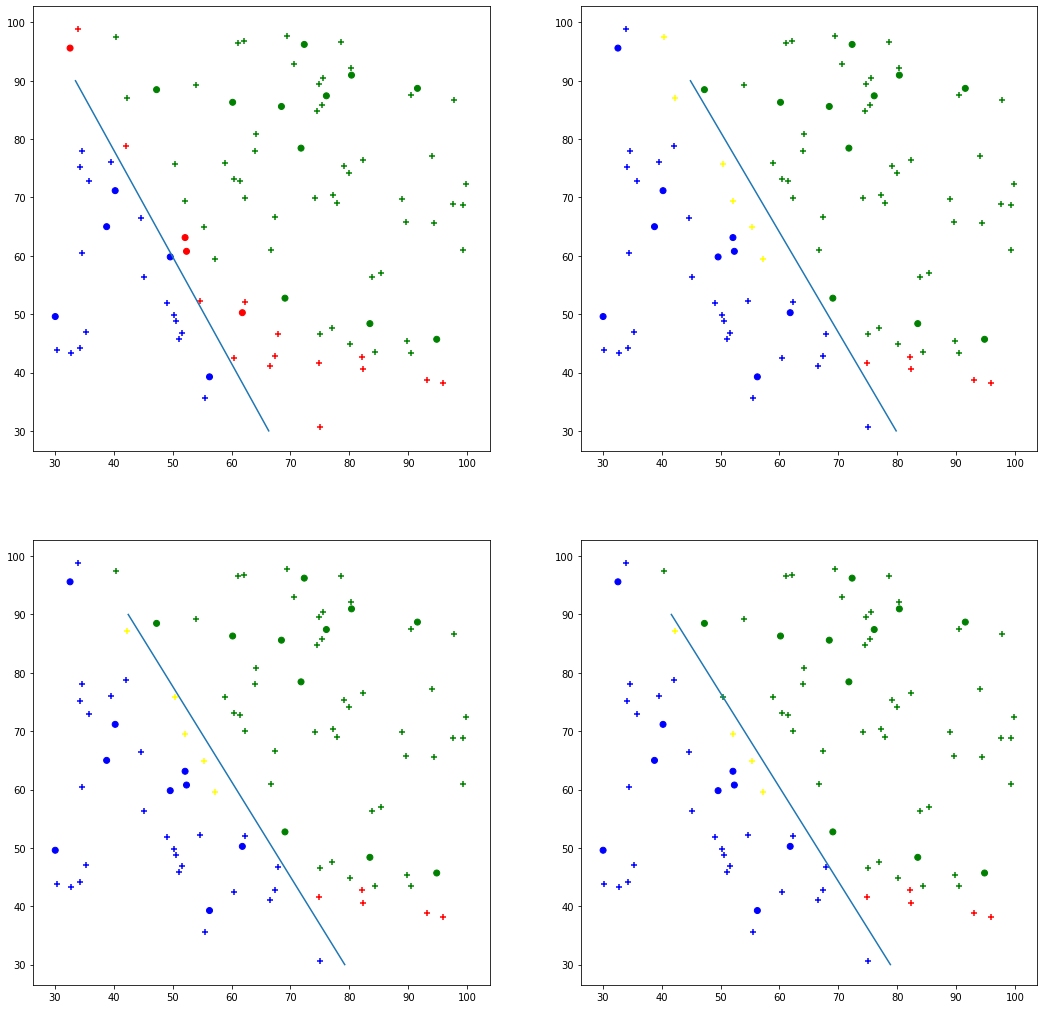

In [7]:
plt.figure(figsize = (18,18))
C = [0.0001, 0.01, 0.1, 1]
for i in range(4):
    plt.subplot(2, 2, i+1)
    clf = linear_model.LogisticRegression(C = C[i])
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    color = [['blue', 'red'], ['yellow', 'green']]
    print('accuracy for test data at C=%f is %f' % (C[i], metrics.accuracy_score(y_test, y_test_pred)))
    print('model complexity:', np.sqrt(np.square(clf.coef_[0][0]) + np.square(clf.coef_[0][1])))
    plt.scatter(x_train[:,0], x_train[:,1], c=[color[j1][j2] for j1, j2 in zip(y_train, y_train_pred)], marker='o')
    plt.scatter(x_test[:,0], x_test[:,1], c=[color[j1][j2] for j1, j2 in zip(y_test, y_test_pred)], marker='+')
    plt.plot((- clf.coef_[0][1] * np.array((30,90)) - clf.intercept_[0]) / clf.coef_[0][0], np.array((30,90)))
plt.show()

### Class Probabilities Contour

In [8]:
#define linspace to capture a little bit more on the margins

def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

In [9]:
# build an estimator with smaller C

estimator = linear_model.LogisticRegression(solver = 'lbfgs', C = 0.001)
estimator.fit(x_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# make a mesh from two arrays of evenly spaced values on the two axes

steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_proba = estimator.predict_proba(mesh_data).reshape(steps, steps, 2)

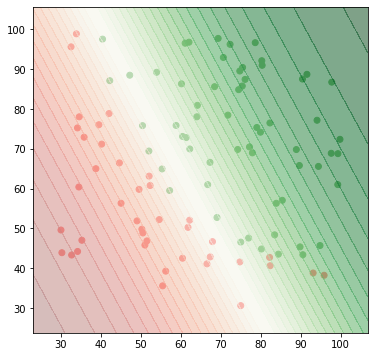

In [11]:
color = ['red', 'green']
y_color = [color[i] for i in y]
contour_color = [plt.cm.Reds, plt.cm.Greens]
plt.figure(figsize = (6, 6))
plt.scatter(x[:,0], x[:,1], c = y_color)
for i in range(2):
    plt.contourf(xx0, xx1, np.maximum(mesh_proba[:,:,i], 0.5), 20, cmap = contour_color[i], alpha = 0.5)
plt.show()

### 3D Visualization

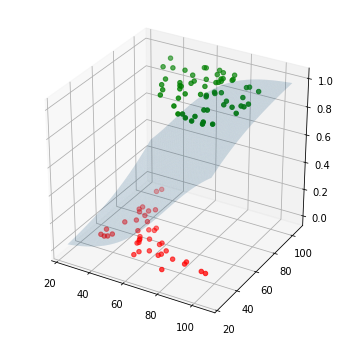

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (6, 6))
ax = fig.gca(projection = '3d')
ax.scatter(x[:,0], x[:,1], y, c = y_color)
ax.plot_surface(xx0, xx1, mesh_proba[:,:,1], rstride = 1, cstride = 1, alpha = 0.2)
plt.show()

### Evaluation of Classification Models

In [13]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.5, random_state = 610)

estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)

count_tp, count_tn, count_fp, count_fn = 0, 0, 0, 0
for i in range(len(y_test)):
    if y_test[i] == 1:
        if y_pred[i] == 1:
            count_tp += 1
        else:
            count_fn += 1
    else:
        if y_pred[i] == 1:
            count_fp += 1
        else:
            count_tn += 1
print(count_tp, '\t', count_fn)
print(count_fp, '\t', count_tn)
print('Accuracy:', (count_tp + count_tn) / (count_tp + count_fp + count_tn + count_fn))
print('Precision:', count_tp / (count_tp + count_fp))
print('Recall:', count_tp / (count_tp + count_fn))

27 	 4
1 	 18
Accuracy: 0.9
Precision: 0.9642857142857143
Recall: 0.8709677419354839


In [14]:
from sklearn import metrics

cf_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

report = """
The evaluation report is:
Confusion Matrix:
{}
Accuracy: {}
Precision: {}
Recall: {} 
""".format(cf_matrix, accuracy, precision, recall)
print(report)


The evaluation report is:
Confusion Matrix:
[[18  1]
 [ 4 27]]
Accuracy: 0.9
Precision: 0.9642857142857143
Recall: 0.8709677419354839 



### Plot ROC curve and compute AUC

AUC: 0.9745331069609507


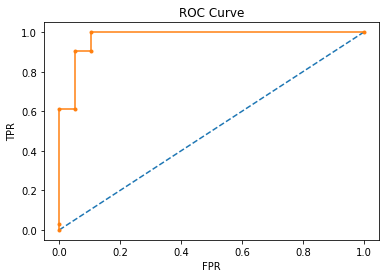

In [15]:
y_pred_prob = estimator.predict_proba(x_test)
# keep probabilities for the positive class only
y_pred_prob = y_pred_prob[:, 1]
# calculate the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
# Calculate AUC
print('AUC:', metrics.roc_auc_score(y_test, y_pred_prob))

plt.plot([0, 1], [0, 1], ls = '--')
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

### Exercise

Try to play with the hyperparameter `C`, and see whether tunning `C` can give better performance in terms of AUC.

### Train a multi-class logistic regression model

In [16]:
# Detail of iris dataset can be found here
# https://archive.ics.uci.edu/ml/datasets/iris

from sklearn import datasets

iris_data = datasets.load_iris()
x = iris_data.data
y = iris_data.target

In [17]:
# Fit a multi-class logistic regression model with one-v.s.-rest
ovr_estimator = linear_model.LogisticRegression(
    solver = 'lbfgs',
    multi_class = 'ovr')
ovr_estimator.fit(x, y)

ovr_predict = ovr_estimator.predict(x)

ovr_report = """
The evaluation report of OVR is:
Confusion Matrix:
{}
Accuracy: {}
""".format(metrics.confusion_matrix(y, ovr_predict),
           metrics.accuracy_score(y, ovr_predict))
print(ovr_report)
print('The classification report of OVR:\n {}'
      .format(metrics.classification_report(y, ovr_predict)))


The evaluation report of OVR is:
Confusion Matrix:
[[50  0  0]
 [ 0 45  5]
 [ 0  2 48]]
Accuracy: 0.9533333333333334

The classification report of OVR:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.90      0.93        50
           2       0.91      0.96      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [18]:
# Fit a multi-class logistic regression model with softmax
sm_estimator = linear_model.LogisticRegression(
    solver = 'lbfgs',
    multi_class = 'multinomial',
    max_iter = 1000)
sm_estimator.fit(x, y)

sm_predict = sm_estimator.predict(x)

sm_report = """
The evaluation report of Softmax is:
Confusion Matrix:
{}
Accuracy: {}
""".format(metrics.confusion_matrix(y, sm_predict),
           metrics.accuracy_score(y, sm_predict))
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y, sm_predict)))


The evaluation report of Softmax is:
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
Accuracy: 0.9733333333333334

The classification report of Softmax:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



### Questions?

1. The evaluation performed above actually doesn't tell us how good the model perform in real life. Why and how should we correct it to get the realistic performance evaluation?

2. Compare the two methods of handling multi-class classification, i.e., one-v.s.-all and softmax. You may think about complexity, interpretation, performance and etc.